In [10]:
import pandas as pd
import os
import scipy.io as sio
import numpy as np
from tqdm import tnrange,tqdm_notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
def concatDataLabel(path):
    mats = []
    index = 0 
    fileNames = np.arange(1000, 11000, 1000).tolist()
    for file in os.listdir(path):
        mats.append(sio.loadmat(path+"labels_"+ str(fileNames[index]) +".mat"))
        index = index + 1
    mats = np.array(mats) 
    myArray = []
    for i in range(0,5):
        for j in range(0,1000):
            myArray.append(mats[i]['data'][0][j])
    return(myArray)

In [5]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(1000, 11000, 1000).tolist()
    for file in os.listdir(path):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat"))
        index = index + 1
    mats = np.array(mats)
    
    myArray = []
    for i in range(0,5):
        for j in range(0,1000):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [6]:
def avgData(data):
    avgArray = []
    start = 0 
    end = 9
    for i in range(0,len(data),10):
        avgArray.append(data[start:end].mean())
        start = start + 10
        end = end + 10
    return(pd.DataFrame(avgArray))

In [79]:
fixedDir = './SBOX_traces2019-11-04_16_35_27/' 
newDir = fixedDir + 'label/'
newDir2 = fixedDir + 'traces/'

df_traces = pd.read_csv(fixedDir + '/traces/trace_sliced_1_5.csv') 

In [80]:
df_traces

,0,1,2,3,4,5,6,7,8,9,...,4190,4191,4192,4193,4194,4195,4196,4197,4198,4199
0,120.444444,146.333333,139.888889,109.333333,106.777778,139.111111,153.000000,134.222222,116.444444,115.666667,...,107.333333,121.666667,134.777778,133.000000,112.111111,108.111111,139.111111,158.888889,141.222222,110.000000
1,111.666667,116.111111,140.222222,131.777778,118.111111,123.444444,138.555556,144.111111,134.444444,120.222222,...,124.222222,101.888889,109.666667,124.222222,132.555556,123.555556,117.333333,133.888889,150.666667,145.777778
2,117.333333,138.666667,139.333333,115.666667,116.111111,132.111111,144.111111,140.222222,121.555556,113.222222,...,143.444444,117.333333,100.555556,110.555556,142.000000,154.555556,127.777778,110.555556,130.555556,154.888889
3,126.000000,137.555556,133.222222,122.000000,121.111111,131.444444,138.444444,133.111111,123.666667,119.222222,...,128.888889,117.111111,111.222222,111.888889,128.222222,141.333333,134.222222,123.888889,129.333333,136.000000
4,119.777778,121.111111,119.000000,121.555556,128.222222,123.888889,125.222222,131.111111,137.333333,126.666667,...,142.333333,112.888889,98.333333,115.777778,147.000000,146.444444,121.333333,116.111111,137.333333,150.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,128.555556,111.666667,115.666667,130.000000,139.888889,135.222222,118.000000,126.444444,147.111111,141.222222,...,93.222222,111.222222,146.222222,144.666667,109.222222,96.666667,139.555556,174.111111,151.000000,99.444444
496,138.555556,123.000000,110.222222,114.222222,132.666667,146.222222,129.888889,115.222222,125.888889,145.444444,...,117.000000,100.555556,111.555556,138.333333,136.555556,124.000000,118.111111,142.666667,164.222222,146.000000
497,125.333333,121.111111,122.888889,130.666667,131.000000,132.666667,123.333333,124.888889,137.888889,136.444444,...,109.444444,122.000000,128.333333,121.000000,114.888889,122.111111,142.000000,145.555556,135.444444,122.555556
498,137.111111,132.777778,119.444444,111.000000,126.111111,142.888889,132.666667,115.222222,125.555556,139.111111,...,109.000000,111.555556,125.888889,132.111111,121.888889,117.111111,125.222222,148.111111,153.555556,132.222222


In [81]:
myData = avgData(df_traces)

In [82]:
myData.head()

,0,1,2,3,4,5,6,7,8,9,...,4190,4191,4192,4193,4194,4195,4196,4197,4198,4199
0,117.765432,124.592593,131.061728,123.530864,121.802469,127.790123,133.604938,136.469136,132.530864,123.148148,...,124.061728,115.580247,116.234568,121.950617,128.456790,129.037037,130.370370,134.938272,139.111111,134.938272
1,133.185185,134.641975,120.086420,107.271605,120.617284,144.506173,140.851852,121.765432,117.074074,131.864198,...,112.037037,113.259259,124.580247,131.358025,120.135802,117.395062,131.395062,147.617284,145.802469,126.530864
2,114.728395,109.222222,126.172840,138.148148,134.432099,121.370370,122.271605,140.975309,148.197531,128.493827,...,119.259259,117.098765,122.691358,123.814815,120.604938,125.296296,136.123457,141.135802,138.962963,129.938272
3,126.000000,128.913580,123.530864,116.530864,121.061728,138.259259,138.024691,127.481481,124.111111,128.790123,...,116.666667,108.296296,120.901235,132.962963,126.395062,117.765432,123.259259,143.037037,150.839506,132.148148
4,132.654321,126.851852,120.074074,116.370370,128.345679,139.938272,131.530864,122.716049,127.753086,134.086420,...,110.679012,111.580247,128.086420,131.864198,120.283951,115.209877,130.777778,149.481481,147.629630,124.580247


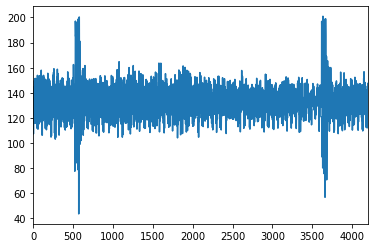

In [84]:
myData.transpose()[1].plot()
#myData.transpose()[1].plot()
#myData.transpose()[2].plot()
#myData.transpose()[3].plot()